In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import array_to_img

In [3]:
# Define the path to the datasets directories

train_path = '/home/sahil/Desktop/applied.ai/computer vision/folder/data/training_set'
test_path = '/home/sahil/Desktop/applied.ai/computer vision/folder/data/training_set'


In [4]:
import os

In [5]:
os.listdir(train_path)

['dogs', 'cats']

In [6]:
# Define some basic parameters

batch_size = 32
img_height = 150
img_width = 150

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Define data loading function

def load_data(path, labels):
    dataset = image_dataset_from_directory(
        directory=path,
        labels=labels,
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
    return dataset

In [9]:
# Load the datasets

train_ds = load_data(train_path, labels='inferred')
test_ds = load_data(test_path, labels='inferred')

Found 8005 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.


In [10]:
# Explore the image labels

class_names = train_ds.class_names
class_names


['cats', 'dogs']

In [11]:
# Show the first nine images from the training dataset

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Standardize the Data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network.

The values should be standardized to be in the [0, 1] range.

In [13]:
from keras.layers import Rescaling
scaling = Rescaling(1. / 255)

train_ds = train_ds.map(lambda x, y: (scaling(x), y))
test_ds = test_ds.map(lambda x, y: (scaling(x), y))
# pred_ds = pred_ds.map(lambda x: scaling(x))

ImportError: cannot import name 'Rescaling' from 'keras.layers' (/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/keras/layers/__init__.py)

# Create Simple CNN Model (sCNN)
The Sequential model consists of three convolution blocks with a max pooling layer in each of them.

 There's a fully-connected layer with 128 units on top of it that is activated by a ReLU activation function ('relu').

This model is a simple model and has not been tuned for high accuracy.

In [14]:
sCNN = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the Model¶
The Compile method configures the model for training and validation using the optimizer, loss function, and evaluation metrics.

This workflow will use the Adam optimizer, the Sparse Categorical Crossentropy loss function, and the Accuracy evaluation metric

In [15]:
sCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
sCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [ ]:
epochs = 10

history = sCNN.fit(train_ds, validation_data=test_ds, epochs=epochs)

Epoch 1/10


In [ ]:
# evaluation
sCNN_loss, sCNN_acc = sCNN.evaluate(test_ds, verbose=2)

In [17]:
import tensorflow as tf

In [18]:
new_model = tf.keras.models.load_model('cat-dog1.h5')

In [ ]:
# evaluation
sCNN_loss, sCNN_acc = new_model.evaluate(test_ds, verbose=2)

In [22]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/sahil/Desktop/applied.ai/computer vision/folder/data/test_set/cats/cat.4001.jpg', target_size = (64, 64))
# Loading the image and converting the pixels into array whcih will be used as input to predict.

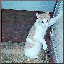

In [23]:
test_image

In [24]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [26]:
result=new_model.predict(test_image)

ValueError: in user code:

    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 20736 but received input with shape (None, 4096)


In [21]:
result = new_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

ValueError: in user code:

    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 20736 but received input with shape (None, 4096)


In [ ]:
#importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
classifier= Sequential() # Initialise the CNN

In [ ]:
# Ist step of Convoltional layer to get feature maps using feature detector
classifier.add(Convolution2D(filters=32, # output feature maps
                             kernel_size=(3,3), # matrix size for feature detector
                             input_shape=(64, 64, 3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function

In [ ]:
# 2nd Pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#2nd convolutional and pooling layer.
classifier.add(Convolution2D(filters=32,
                             kernel_size=(3,3), 
                             kernel_initializer='he_uniform', 
                             activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


in case we dont do do convolutional and pooiling and directly flatten our input image pixel and pass it , out network wont be able to find the relations between each pixels and will treat each pixel indiviually.

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

In [ ]:
#Step 4 full connection in which input we have from flattening

classifier.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu')) 
#step 5 output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting the model
In this we first need to do image augmentation using kera image preprocessing modules. It is necessary to to avoid the overfitting when we have less data to train which leat to high training accuracy and low testing accuracy.

In this we will make different batches of sub samples , in each batch it will have random transformations like rotating, shifting and flipping which will add diversity to data and being random our model wont get same image to get trained on.

This will help us in high performance with no overfitting

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#applying all the transformation we want to apply to training data set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
#Rescling the test data set images to use for validation.
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
#Getting My training data ready for validation, so it will read all the data with the px size we gave.

training_set= train_datagen.flow_from_directory(directory= 'dataset/training_set',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=50,
                                               class_mode='binary' # for 2 class binary 
                                               )

In [ ]:
#Getting My test data ready for validation, so it will read all the data with the px size we gave.

test_set= test_datagen.flow_from_directory(directory= 'dataset/test_set',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=50,
                                               class_mode='binary' # for 2 class binary
                                          )

In [ ]:

classifier.fit_generator(training_set, #training data to fit
                        steps_per_epoch=8000, # Data in training set
                        epochs=5, # No of epochs to run
                        validation_data=test_set, # Test or validation set
                        validation_steps=2000 # no of data point for validation
                        )

In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# Loading the image and converting the pixels into array whcih will be used as input to predict.
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'